In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm


In [2]:
# data
heights = np.array([164, 167, 163, 158, 170, 183, 176, 159, 170, 167])

In [3]:
print(len(heights))

10


##### Problem a

In [4]:
# known parameters
sigma1 = 9
mu1 = 164

In [5]:
# negative log likelihood funch
def neg_log_likelihood(params):
    mu2, sigma2 = params
    likelihood = 0.5 * norm.pdf(heights, loc=mu1, scale=sigma1) + \
                 0.5 * norm.pdf(heights, loc=mu2, scale=sigma2)
    return -np.sum(np.log(likelihood))


In [6]:
# Initialize the guesses for mu2 and sigma2
initial_guess = [170, 9]

# Minimize the negative log likelihood
result = minimize(neg_log_likelihood, initial_guess, bounds=((None, None), (1e-6, None)))

In [7]:
result

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 34.40372856247068
        x: [ 1.690e+02  7.071e+00]
      nit: 7
      jac: [-7.105e-07 -7.105e-07]
     nfev: 27
     njev: 9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [8]:
mu2_mle, sigma2_mle = result.x
print(mu2_mle, sigma2_mle)

168.96656616660277 7.071450686723574


##### scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, options=None)
Specifies the optimization algorithm to use.
Common methods include:
* ```BFGS (default)```: A quasi-Newton method.
* ```CG```: Conjugate gradient method.
* ```L-BFGS-B```: Bounded, limited-memory BFGS.
* ```TNC```: Truncated Newton algorithm.
* ```Nelder-Mead```: Simplex algorithm, does not use gradient information.
* ```Powell```: A method that uses a conjugate direction set, doesn't require the derivative.
* ```SLSQP```: Sequential Least Squares Programming for constrained minimization.


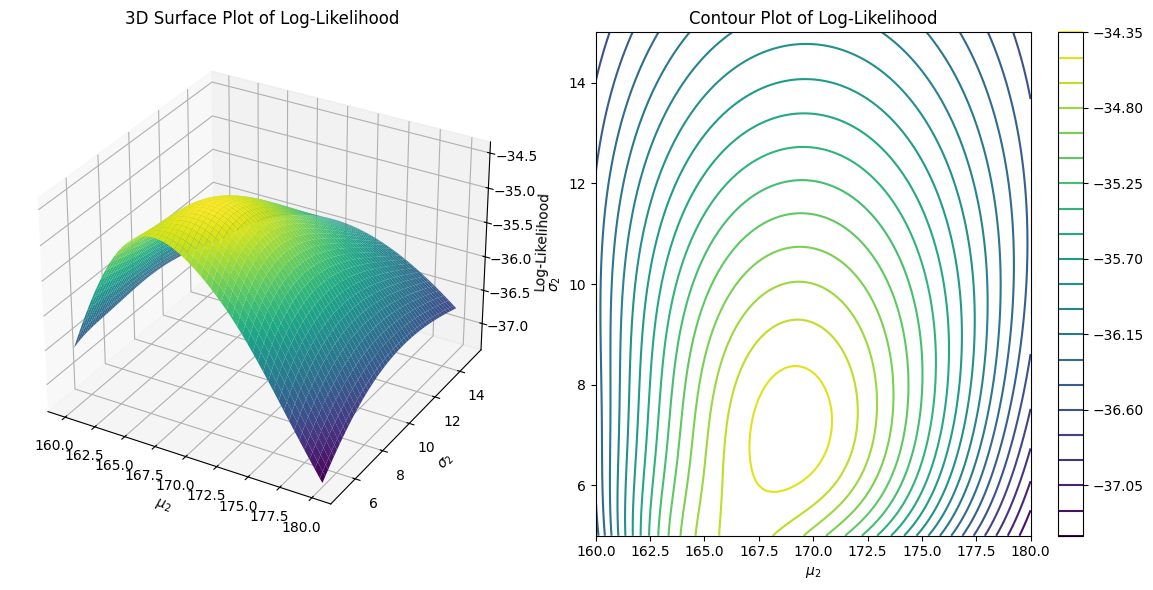

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
heights = np.array([164, 167, 163, 158, 170, 183, 176, 159, 170, 167])

# Known parameters
sigma1 = 9
mu1 = 164

# Define the log-likelihood function
def log_likelihood(mu2, sigma2):
    likelihoods = 0.5 * norm.pdf(heights, loc=mu1, scale=sigma1) + 0.5 * norm.pdf(heights, loc=mu2, scale=sigma2)
    return np.sum(np.log(likelihoods))

# Create a grid of mu2 and sigma2 values
mu2_values = np.linspace(160, 180, 100)
sigma2_values = np.linspace(5, 15, 100)
mu2_grid, sigma2_grid = np.meshgrid(mu2_values, sigma2_values)

# Calculate the log-likelihood for each combination of mu2 and sigma2
log_likelihood_values = np.array([[log_likelihood(mu2, sigma2) for mu2 in mu2_values] for sigma2 in sigma2_values])

# Plotting the 3D surface plot
fig = plt.figure(figsize=(12, 6))

# 3D Surface plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(mu2_grid, sigma2_grid, log_likelihood_values, cmap='viridis')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('$\sigma_2$')
ax.set_zlabel('Log-Likelihood')
ax.set_title('3D Surface Plot of Log-Likelihood')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(mu2_grid, sigma2_grid, log_likelihood_values, levels=20, cmap='viridis')
ax2.set_xlabel('$\mu_2$')
ax2.set_ylabel('$\sigma_2$')
ax2.set_title('Contour Plot of Log-Likelihood')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

##### Problem b

In [58]:
# known parameters
sigma1 = sigma2 = 9
# Negative log-likelihood funcn
def neg_log_likelihood_mu(params):
    mu1, mu2 = params
    likelihood = 0.5 * norm.pdf(heights, loc=mu1, scale=sigma1) + \
                0.5 * norm.pdf(heights, loc= mu2, scale=sigma2)
    return -np.sum(np.log(likelihood))

In [59]:
# Initial guesses for mu1, and mu2
initial_guess = [160, 170]

# Minimize the negative log likelihood
result = minimize(neg_log_likelihood_mu, initial_guess)

In [60]:
mu1_mle, mu2_mle = result.x
print(mu1_mle, mu2_mle)

167.70007836208123 167.69995963172656


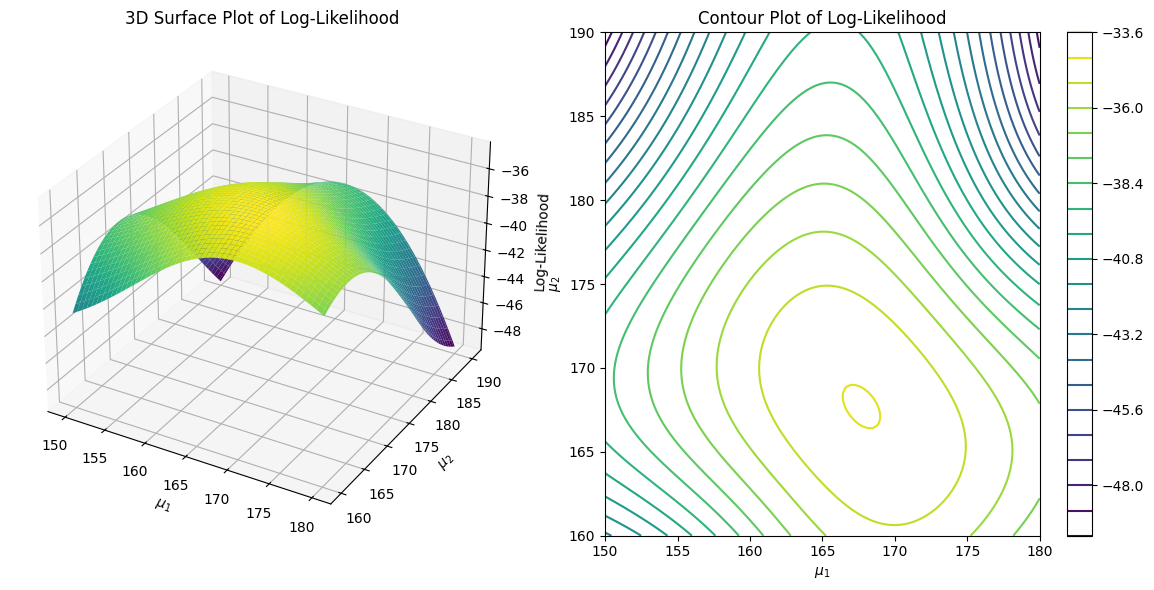

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data: Heights of students
heights = np.array([164, 167, 163, 158, 170, 183, 176, 159, 170, 167])

# Known variance
sigma1 = sigma2 = 9

# Define the log-likelihood function
def log_likelihood(mu1, mu2):
    likelihoods = 0.5 * norm.pdf(heights, loc=mu1, scale=sigma1) + 0.5 * norm.pdf(heights, loc=mu2, scale=sigma2)
    return np.sum(np.log(likelihoods))

# Create a grid of mu1 and mu2 values
mu1_values = np.linspace(150, 180, 100)
mu2_values = np.linspace(160, 190, 100)
mu1_grid, mu2_grid = np.meshgrid(mu1_values, mu2_values)

# Calculate the log-likelihood for each combination of mu1 and mu2
log_likelihood_values = np.array([[log_likelihood(mu1, mu2) for mu1 in mu1_values] for mu2 in mu2_values])

# Plotting the 3D surface plot and contour plot
fig = plt.figure(figsize=(12, 6))

# 3D Surface plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(mu1_grid, mu2_grid, log_likelihood_values, cmap='viridis')
ax.set_xlabel('$\mu_1$')
ax.set_ylabel('$\mu_2$')
ax.set_zlabel('Log-Likelihood')
ax.set_title('3D Surface Plot of Log-Likelihood')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(mu1_grid, mu2_grid, log_likelihood_values, levels=20, cmap='viridis')
ax2.set_xlabel('$\mu_1$')
ax2.set_ylabel('$\mu_2$')
ax2.set_title('Contour Plot of Log-Likelihood')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()
